In [26]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib
import re
from matplotlib import pyplot as plt
from nltk.corpus import stopwords 
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from sklearn.model_selection import GridSearchCV
from sklearn.multiclass import OneVsRestClassifier


In [2]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [3]:
print(train.shape)
print(test.shape)

(157571, 2)
(2000, 1)


In [4]:
train.head()

,comment_text,toxic
0,Barcelona football seasons (early 20th century...,0
1,"""\n\n answering questions \n\nI won't have a c...",0
2,"""\n\nIssues\nOnefortyone, the reason why I rem...",0
3,"""\nIn that case would """"new age"""" at least be ...",0
4,"Mr. Wolf,\nWe need to have a serious talk abou...",0


In [5]:
train.isna().sum()

comment_text    0
toxic           0
dtype: int64

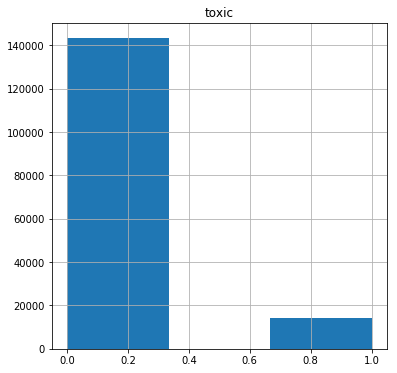

In [6]:
train.hist(figsize=(6, 6), bins=3)
plt.show()

In [7]:
pd.set_option("display.max_colwidth", 999)
train[(train["toxic"]==1)]

,comment_text,toxic
8347,"Hey Rama!! \n\nHey Rama, Raima, or whatever your name is, keep your nose out of my business and tend to your own affairs. If I want to post a message on users David-A or Gaashooru's talk pages, that my business, stay out of it!!!!",1
8351,"Hey James ? I DID provide those exact same URL's in the first place politely. Your asslicking self-important buddy editor turned it into a pissing contest, not me. If either he or you could actually read, this would never have got to this point. \n\n But since you are illiterate, I have a suggestion for you - turn your worthless fucking loser block into thirty years. \n\n And jam your useless fucking loser wikipedia up your ass, while you're at it, fool.\n\n Bye",1
8360,"Wehwalt, what the fuck is this? Your own personal little fiefdom? What you're doing here is astonishingly wrong and you know it. I get that you don't like Shapiro, but you know perfectly well that alleged reprints by militant Internet activists from unknown and defunct print sources are worthless. Oh hey, and it looks like I already crossed paths with you here months ago, but you didn't give up. This is garbage and you know it.",1
8363,.\n\nfuck you. learn how to type a url correctly you jerkoff,1
8368,"Dare send messages like this. You are the cause of Vandalism not me,...&*%$4@###banged up head",1
8384,"And next time, actually first create the voting page for an AFD before bothering an editor who did hard work creating an article so you don’t waste so much of another human being’s time. I’m too busy in real life making money and paying taxes to bother with this shit.",1
8385,Fuck off you Paki bastard. Take your sad pathetic life somewhere else!,1
8390,"Well since you've stated that you don't care, then piss off and leave things such as this to people that actually have the power to do something (i.e. the admins) about the asinine reverts caused by that random fucktard.",1
8401,Bongwarrior is a homosexual prostitute \n\nBongwarrior is a homosexual prostitute.\n\nYou can fuck him in the ass for $25.\n\nHe likes it when two men fuck him in the ass at the same time. He likes the feeling of his anus being stretched wide open.\n\nHe will also lick the shit off of your dick when you are done.\n\n119.245.91.247,1
8406,"The Wack Pack \n\nYou're fucking insane and drunk with power. Instead of totally removing big Howard Stern guys like Crackhead Bob and Fred the Elephant Boy, why not just remove the parts that your majesty finds offensive?",1


In [8]:
train[(train["toxic"]==0)]

,comment_text,toxic
0,"Barcelona football seasons (early 20th century) \n\nI looked at the Barcelona football seasons for which you added (and some other seasons after). They could do with , really. (I don't think it's worth listing at WP:PNT, but this should put them in view of one way or another, or if not that could be added to their talk pages). I don't want to do it myself (a) because I am lazy and (b) because I know nothing about football and would probably make translation mistakes.",0
1,"""\n\n answering questions \n\nI won't have a chance to say hello or goodbye when I'm blocked/banned/whatever. So, """"Hello; I'm not holding my breath on anyone addressing your questions concerning Dawn Well's page on Wiki; and I better get in a good-bye, as I feel I have the lifespan of a May fly in a low ceilinged room full of bullfrogs; not because I’m wrong, but because anyone on your side of the issue is going to be attacked and baited into some infraction, an infraction ignored by someone they like, but an infraction that will be worthy of execution when committed by me.”""",0
2,"""\n\nIssues\nOnefortyone, the reason why I removed your edits, because they have following problems:-\n\nIt is Graceland that is 2nd most visited place in the USA., , , Not Biltmore Estate.\n""""The décor throughout the house has often been criticized"""" is incorrect, it has not been criticized by anyone. Then you put up the quotes of Albert Goldman, a fringe theorist on Elvis Presley, and added them under Graceland#Basement, which is irrelevant.\nThose """"conflicting reports"""" about his death have no relevance on this article, especially when they are disputed or rejected enough times.\n This is why this kind of content misleads and should be removed. I don't see any consensus for adding it on archives or previous discussion either. """,0
3,"""\nIn that case would """"new age"""" at least be acceptable? _friend """,0
4,"Mr. Wolf,\nWe need to have a serious talk about Asthma. Have you done any reading about ASTHMA? The Beta Adrenergic Theory is the ONLY Theory of Asthma that can be associated with one name {not including crackpots} so your question about other names insults my intelligence!!!!!!!!!!!!!!!!!!!! Not only that but in contrast to other theories this one has been cited more than any other article in the history of the Journal of Allergy according to the GARFIELED LIBRARY at The University of Pennsylvania. \nLast but not least, my comment would be out of place in the history section because it relates DIRECTLY to the BA2 polymorphism. Since other polymorphisms CANNOT be related to a specific theory, much less to a specific individual, your comment doesn't make any sense.",0
5,"""Please note that DPeterson has now starting accusing me of vandalism for editing this very page Advocates for Children in Therapy. I chose to edit by asking for citations for the """"facts"""" he published on the page. How can that be vandalism? It seems he can run roughshod over Wiki policy and guidelines, but any reasonable attempt to make him justify it is """"vandalism"""". \n\n""",0
6,"Bald Eagle\nI've addressed all your points so far. Cheers, Jude.",0
7,"SARAH \n\nYou deleted it, but it remains. I emailed oversight hours ago. They just replied saying thanks and the team has suppressed the information. It remains.",0
8,"Rand Paul \n\nAre you monitoring Rand Paul? If not, you might remove the template from the talk page. Thanks. –",0
9,Poor AFD rationales \n Wikipedia:Articles for deletion/Joe E. Newsome High School\n Wikipedia:Articles for deletion/Wallpaper review\nSee,0


In [9]:
target = train['toxic']

In [10]:
features = pd.DataFrame()
features['length_of_text'] = train['comment_text'].apply(len)

print ("Mean number of letter in non-toxic comments: ", (features[train['toxic']==0]['length_of_text']).mean()) 
print ("Mean number of letter in toxic comments: ", (features[train['toxic']==1]['length_of_text']).mean())


Mean number of letter in non-toxic comments:  404.4461986222492
Mean number of letter in toxic comments:  293.0163005456835


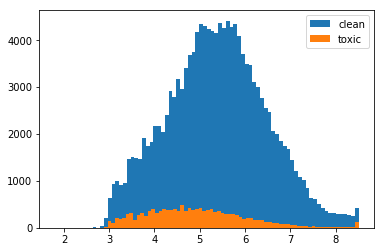

In [11]:
plt.hist(np.log(features[train['toxic']==0]['length_of_text']), bins=80, label='clean')
plt.hist(np.log(features[train['toxic']==1]['length_of_text']), bins=80, label='toxic')
plt.legend()
plt.show()

Не забыть написать почему логарифмировал и что за всплеск в конце


In [12]:
stop = stopwords.words('english')
wnl = WordNetLemmatizer()
def lower_case(word_array):
    word_array = word_array.str.lower()
    return word_array
def remove_stopwords(word_array):
    word_array = word_array.apply(lambda x: " ".join(x for x in str(x).split() if x not in stop))
    return word_array
def remove_punc(word_array):
    word_array = word_array.str.replace('[^\w\s]' ,'')
    word_array = word_array.str.replace('\n','')
    word_array = word_array.str.replace('  ' ,' ')
    return word_array
def remove_numbers(word_array):
    word_array = word_array.apply(lambda x : re.sub(r'\d+', '', x))
    return word_array
def tokenize(word_array):
    word_array = word_array.apply(word_tokenize)
    return word_array
def lemm_words(word_array):
    word_array = word_array.apply(lambda x: " ".join([wnl.lemmatize(word) for word in x.split()]))
    return word_array

In [13]:
def clean_pipeline(word_array):
    word_array = lower_case(word_array)
    word_array = remove_stopwords(word_array)
    word_array = remove_punc(word_array)
    word_array = lemm_words(word_array)
    word_array = remove_numbers(word_array)
    word_array = tokenize(word_array)
    return word_array

In [16]:
train = clean_pipeline(train['comment_text'])
test = clean_pipeline(test['comment_text'])

In [17]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [18]:
def identity_tokenizer(text):
    return text

tfidf = TfidfVectorizer(tokenizer=identity_tokenizer, stop_words='english', lowercase=False)    
X = tfidf.fit_transform(train)

In [19]:
y = tfidf.transform(test)

In [27]:
from sklearn.svm import SVC


tuned_parameters = [
    {
    'estimator__kernel': ['rbf'],
    'estimator__gamma': [1e-3, 1e-4],
    'estimator__C': [1, 10, 100, 1000]
  },
    {
    'estimator__kernel': ['poly'], 
    'estimator__C': [1, 10, 100, 1000]
  }
]
model_to_set = OneVsRestClassifier(SVC(), n_jobs=-1)
clf = GridSearchCV(model_to_set, tuned_parameters)
#clf = SVC()

In [28]:
from scipy.sparse import hstack
X = hstack((X, np.array(features['length_of_text'])[:,None]))

In [29]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, target, test_size=0.33, random_state=42)

In [ ]:
clf.fit(X_train, y_train) 

In [ ]:
'''features_TEST = pd.DataFrame()
features_TEST['length_of_text'] = test['comment_text'].apply(len)
'''

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(clf.predict(X_test), y_test)


не забыть посмотреть гиперпараметры!

In [ ]:
'''from sklearn import grid_search
def svc_param_selection(X, y, nfolds):
    Cs = [0.001, 0.01, 0.1, 1, 10]
    gammas = [0.001, 0.01, 0.1, 1]
    param_grid = {'C': Cs, 'gamma' : gammas}
    grid_search = GridSearchCV(svm.SVC(kernel='rbf'), param_grid, cv=nfolds)
    grid_search.fit(X, y)
    grid_search.best_params_
    return grid_search.best_params_'''